In [1]:
import matplotlib
import pandas
import scipy.stats

%matplotlib inline

# Prepare

### Load Data

In [2]:
source = pandas.read_csv('medicaid_expansion.csv')

In [3]:
source = source.sort_values('Percent Eligible', ascending=True)

### Utility Functions

In [4]:
FONT_FAMILY = 'Lato'

In [5]:
def style_graph(ax, title, x_label, y_label, x_range, y_range):
    """Style a matplotlib graph.
    
    Args:
        ax: The matplob axes to manipulate.
        title: The string title to have appear at the top of the graphic.
        x_label: The label for the hoizontal axis.
        y_label: The label for the vertical axis.
        x_range: Two element tuple or list with the minimum and maximum values for the horizontal axis.
        y_range: Two element tuple or list with the minimum and maximum values for the vertical axis.
    """
    ax.spines['top'].set_color('#ffffff')
    ax.spines['right'].set_color('#ffffff')
    ax.spines['bottom'].set_color('#ffffff')
    ax.spines['left'].set_color('#ffffff')

    ax.set_xlabel(x_label, fontname=FONT_FAMILY, fontweight='medium', fontsize=12)
    ax.set_ylabel(y_label, fontname=FONT_FAMILY, fontweight='medium', fontsize=12)

    ax.xaxis.label.set_color('#555555')
    ax.yaxis.label.set_color('#555555')

    ax.tick_params(axis='x', colors='#555555')
    ax.tick_params(axis='y', colors='#555555')

    if x_range:
        ax.set_xlim(x_range)
    
    if y_range:
        ax.set_ylim(y_range)

    if title:
        ax.set_title(title, fontname=FONT_FAMILY, fontweight='medium', fontsize=13, color="#505050")
        ax.title.set_position([.5, 1.05])

    for tick in ax.get_xticklabels():
        tick.set_fontname(FONT_FAMILY)
        tick.set_fontweight('medium')

    for tick in ax.get_yticklabels():
        tick.set_fontweight('medium')

# Tests

### Hypothesis 1: The newly unemployed in states with expanded medicaid will qualify for medicaid at higher rates

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


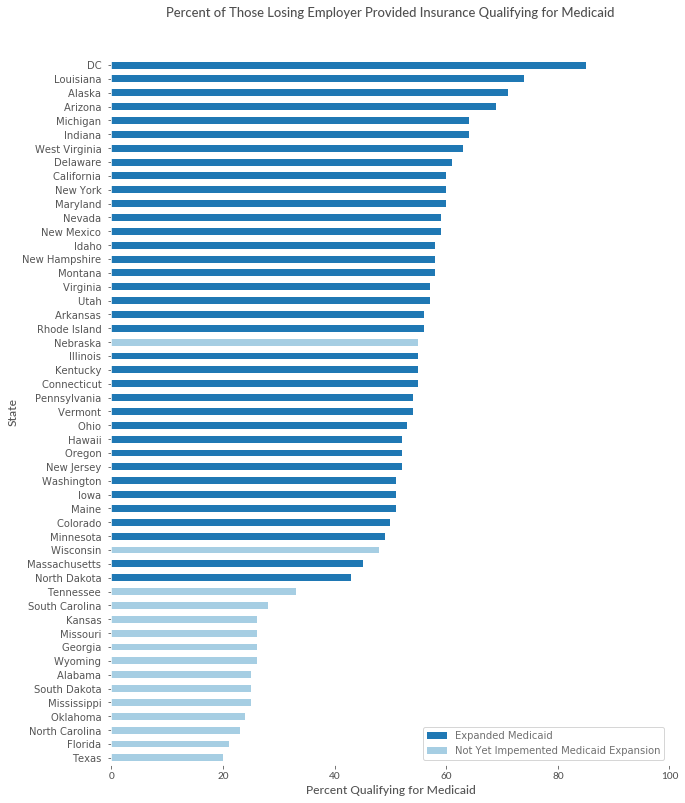

In [6]:
ax = source.plot.barh(
    x='State',
    y=[
        'With Expansion',
        'Without Expansion'
    ],
    figsize=(10, 13),
    stacked=True,
    colors=['#1f78b4', '#a6cee3'] * 21
)

texts = ax.legend().get_texts()
texts[0].set_text('Expanded Medicaid')
texts[1].set_text('Not Yet Impemented Medicaid Expansion')
texts[0].set_color('#707070')
texts[1].set_color('#707070')

style_graph(
    ax,
    'Percent of Those Losing Employer Provided Insurance Qualifying for Medicaid',
    'Percent Qualifying for Medicaid',
    'State',
    [0, 100],
    None
)

In [7]:
with_expansion = source[source['Had Expansion'] == 1]
without_expansion = source[source['Had Expansion'] == 0]

In [8]:
p_value = scipy.stats.mannwhitneyu(with_expansion['Percent Eligible'], without_expansion['Percent Eligible'])[1]

In [9]:
if p_value < 0.05:
    print('Hypothesis accepted.')

Hypothesis accepted.
